In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt # 데이터 시각화
import seaborn as sns
import missingno as msno
import os
import re
import multiprocessing # 여러 개의 일꾼 (cpu)들에게 작업을 분산시키는 역할
from multiprocessing import Pool 
from functools import partial # 함수가 받는 인자들 중 몇개를 고정 시켜서 새롭게 파생된 함수를 형성하는 역할
from data_loader_v2 import data_loader_v2

%matplotlib inline
plt.rcParams["figure.figsize"] = (13,10)

In [31]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense, Embedding
from keras.layers import Flatten, Dropout
from keras.layers import Conv1D, MaxPooling1D
from keras.callbacks import EarlyStopping, ModelCheckpoint, CSVLogger
from keras.utils import np_utils
import keras
import lightgbm as lgb
seed = 777

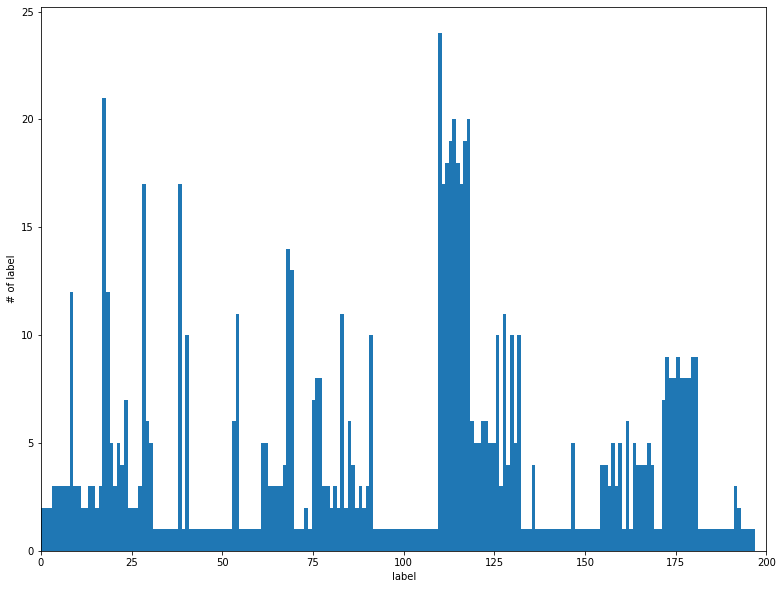

In [3]:
train_label = pd.read_csv("train_label.csv")
plt.hist(train_label['label'], bins=len(train_label['label'].unique()))
plt.xlim(0,200)
plt.ylim(bottom=0)
plt.xlabel('label')
plt.ylabel('# of label')
plt.show()

In [4]:
# 전체적으로 Imbalance Data, 1개뿐인 라벨이 많음

In [5]:
# Bad, CLOSE, Equip Fail, No Data, Normal, OFF, ON, OPEN, System.Char[] 등 문자열 데이터를 포함

In [6]:
realData1 = "Train/30.csv"
realData2 = "Test/1154.csv"
realData3 = "Test/1168.csv"
realData4 = "additinal_data/additinal_data1"
realData5 = "additinal_data/additinal_data2"

In [7]:
train_folder = 'train/'
test_folder = 'test/'
train_label_path = 'train_label.csv'

In [8]:
train_list = os.listdir(train_folder)
test_list = os.listdir(test_folder)
train_label = pd.read_csv(train_label_path, index_col=0)

# DataPreprocessn  

In [9]:
# 모든 csv 파일의 상태_B로 변화는 시점이 10초로 가정
def data_loader_v2_all(func, files, folder='', train_label=None, event_time=10, nrows=60):   
    func_fixed = partial(func, folder=folder, train_label=train_label, event_time=event_time, nrows=nrows)     
    if __name__ == '__main__':
        pool = Pool(processes=multiprocessing.cpu_count()) 
        df_list = list(pool.imap(func_fixed, files)) 
        pool.close()
        pool.join()        
    combined_df = pd.concat(df_list)    
    return combined_df

In [10]:
#train = data_loader_v2_all(data_loader_v2, train_list, folder=train_folder, train_label=train_label, event_time=10, nrows=60)
#train.to_csv("base_train.csv")
train = pd.read_csv("base_train.csv", index_col='Unnamed: 0')

In [11]:
# 모든 test 셋 데이터에 대해서 10초부터 상태_B가 시작된다고 가정 
#test = data_loader_v2_all(data_loader_v2, test_list, folder=test_folder, train_label=None, event_time=10, nrows=60)
#test.to_csv("base_test.csv")
test = pd.read_csv("base_test.csv", index_col='Unnamed: 0')

In [12]:
train_c = train.copy()
train_label = train_c['label']
train_data = train_c.drop(['label'], axis=1)

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(train_1, train_y, test_size=0.2, random_state=seed)
print(X_train,X_test,Y_train,Y_test)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

         V0000     V0001     V0002     V0003     V0004       V0005  \
666  30.460902  8.696729  8.678150  8.707048  8.743941  187.271493   
675  30.467751  8.634908  8.721089  8.677828  8.720551  208.165981   
547  30.473759  8.729892  8.689503  8.666899  8.672289  253.143294   
248  30.484401  8.759098  8.716958  8.730716  8.687358  178.700974   
389  30.469542  8.785799  8.717737  8.735726  8.717749  176.454884   
..         ...       ...       ...       ...       ...         ...   
811  23.635265  4.311902  4.222889  3.817453  3.780163  -23.022390   
317  30.477458  8.750068  8.722127  8.723330  8.707557  196.777031   
589  30.470703  8.831234  8.686700  8.706548  8.714215  187.066875   
819  30.446290  8.736160  8.680907  8.678161  8.692547  279.684095   
525  30.476703  8.689716  8.664188  8.677084  8.653015  239.878768   

          V0006         V0007  V0008       V0009  ...  V5111  V5112  V5113  \
666  220.187777 -2.609061e-19    0.0   -0.000446  ...    1.0    1.0    1.0   
675

In [32]:
robustScaler = RobustScaler()

In [53]:
rob_train_1 = pd.DataFrame(robustScaler.fit_transform(train_1), columns=train_1.columns, index = train_1.index.values)
rob_test = pd.DataFrame(robustScaler.fit_transform(test), columns=test.columns, index = test.index.values)

In [48]:
r_X_train, r_X_test, r_Y_train, r_Y_test = train_test_split(rob_train_1, train_y, test_size=0.2, random_state=seed)
print(r_X_train,r_X_test,r_Y_train,r_Y_test)
print(r_X_train.shape,r_X_test.shape,r_Y_train.shape,r_Y_test.shape)

          V0000      V0001       V0002       V0003       V0004     V0005  \
666   -0.686373  -0.258664   -0.966421    0.070733    1.182847 -0.324421   
675   -0.259886  -0.833324    0.597189   -0.600461    0.460626  0.558946   
547    0.114254   0.049602   -0.553022   -0.851495   -1.029616  2.460476   
248    0.776996   0.321080    0.446751    0.614380   -0.564326 -0.686762   
389   -0.148344   0.569288    0.475110    0.729478    0.374098 -0.781721   
..          ...        ...         ...         ...         ...       ...   
811 -425.761128 -41.017939 -163.205259 -112.244763 -152.089454 -9.215128   
317    0.344627   0.237146    0.634973    0.444730    0.059377  0.077449   
589   -0.076033   0.991626   -0.655079    0.059241    0.264972 -0.333072   
819   -1.596356   0.107864   -0.866058   -0.592821   -0.404099  3.582555   
525    0.297606  -0.323860   -1.474858   -0.617546   -1.624753  1.899684   

        V0006         V0007  V0008          V0009  ...  V5111  V5112  V5113  \
666  0.6

# RandomForestClaasifier

In [57]:
model = RandomForestClassifier(random_state=0, verbose=1, n_jobs=-1)
model.fit(X_train, Y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  4.1min finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=1,
                       warm_start=False)

In [61]:
expected_y  = Y_test
predicted_y = model.predict(X_test).round()
print(); print('RandomForestClassifier: ')
print(); print(metrics.classification_report(expected_y, predicted_y))
print(); print(metrics.confusion_matrix(expected_y, predicted_y))

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.4s



RandomForestClassifier: 

              precision    recall  f1-score   support

           0       1.00      0.80      0.89        20
           1       1.00      0.47      0.64        17
           2       0.95      0.82      0.88        22
           3       0.91      0.80      0.85        25
           4       0.96      0.71      0.82        38
           5       1.00      0.85      0.92        41
           6       1.00      0.92      0.96        37
           7       1.00      0.93      0.96        28
           8       0.68      0.92      0.78       125
           9       0.23      0.11      0.15        28
          10       0.33      0.75      0.46        32
          11       0.00      0.00      0.00        22
          12       0.88      0.28      0.42        25
          13       1.00      0.06      0.11        35
          14       0.25      0.27      0.26        30
          15       0.60      0.56      0.58        16
          16       0.40      0.29      0.33        35


[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.0s finished
/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [54]:
model = RandomForestClassifier(random_state=0, verbose=1, n_jobs=-1)
model.fit(rob_train_1, train_y)
pred = model.predict_proba(rob_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  4.5min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    2.3s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    4.8s finished


In [55]:
submission = pd.DataFrame(data=pred)
submission.index = test.index
submission.index.name = 'id'
submission = submission.sort_index()
submission = submission.groupby('id').mean()
submission.to_csv('submission_baseline_rob.csv', index=True) #제출 파일 만들기

# LightGBM

In [121]:
train_1.columns = ["".join (c if c.isalnum() else "_" for c in str(x)) for x in train_1.columns]

X_train.columns = ["".join (c if c.isalnum() else "_" for c in str(x)) for x in X_train.columns]
X_test.columns = ["".join (c if c.isalnum() else "_" for c in str(x)) for x in X_test.columns]

train_ds = lgb.Dataset(X_train, label = Y_train)
test_ds = lgb.Dataset(X_test, label = Y_test)

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [11]:
model = lgb.LGBMClassifier()
#model.fit(X_train,Y_train)
lgb_params = {
        'objective':'multiclass',
        'metric':'multi_logloss',
        'num_class':198,
        'learning_rate':0.02,
        'seed': 5,
        'n_jobs': -1
    
    }

In [12]:
model = lgb.train(lgb_params, train_ds, 100, test_ds, verbose_eval=True, early_stopping_rounds=20)

[1]	valid_0's multi_logloss: 3.28624
Training until validation scores don't improve for 20 rounds
[2]	valid_0's multi_logloss: 3.02749
[3]	valid_0's multi_logloss: 2.84508
[4]	valid_0's multi_logloss: 2.69981
[5]	valid_0's multi_logloss: 2.57696
[6]	valid_0's multi_logloss: 2.47148
[7]	valid_0's multi_logloss: 2.37878
[8]	valid_0's multi_logloss: 2.29634
[9]	valid_0's multi_logloss: 2.22167
[10]	valid_0's multi_logloss: 2.15358
[11]	valid_0's multi_logloss: 2.09138
[12]	valid_0's multi_logloss: 2.03358
[13]	valid_0's multi_logloss: 1.97991
[14]	valid_0's multi_logloss: 1.92964
[15]	valid_0's multi_logloss: 1.88244
[16]	valid_0's multi_logloss: 1.83787
[17]	valid_0's multi_logloss: 1.79593
[18]	valid_0's multi_logloss: 1.75591
[19]	valid_0's multi_logloss: 1.718
[20]	valid_0's multi_logloss: 1.68209
[21]	valid_0's multi_logloss: 1.64778
[22]	valid_0's multi_logloss: 1.61461
[23]	valid_0's multi_logloss: 1.58296
[24]	valid_0's multi_logloss: 1.55287
[25]	valid_0's multi_logloss: 1.5239
[

In [13]:
import joblib
#joblib.dump(model, 'lgbmodel.pkl')

In [17]:
model = joblib.load('lgbmodel.pkl')

In [56]:
#model2.fit(lgb_params, train_ds, 100, test_ds, early_stopping_rounds=20)
model3 = lgb.LGBMClassifier(learning_rate=0.02, boosting_type = 'gbdt', metric = 'multi_logloss', seed = 777, n_jobs = -1)
evals = [(r_X_test, r_Y_test)]
model3.fit(r_X_train, r_Y_train, eval_set=evals, eval_metric='logloss', early_stopping_rounds=20, verbose=True)

[1]	valid_0's multi_logloss: 3.4526
Training until validation scores don't improve for 20 rounds
[2]	valid_0's multi_logloss: 3.19536
[3]	valid_0's multi_logloss: 3.0072


KeyboardInterrupt: 

In [59]:
#model2.fit(lgb_params, train_ds, 100, test_ds, early_stopping_rounds=20)
model3 = lgb.LGBMClassifier(learning_rate=0.05, metric = 'multi_logloss', seed = 777)
evals = [(r_X_test, r_Y_test)]
model3.fit(r_X_train, r_Y_train, eval_set=evals, eval_metric='logloss', early_stopping_rounds=20, verbose=True)

[1]	valid_0's multi_logloss: 2.33278
Training until validation scores don't improve for 20 rounds
[2]	valid_0's multi_logloss: 2.20712
[3]	valid_0's multi_logloss: 2.12642
[4]	valid_0's multi_logloss: 2.05767
[5]	valid_0's multi_logloss: 1.98369
[6]	valid_0's multi_logloss: 1.89083
[7]	valid_0's multi_logloss: 1.82254
[8]	valid_0's multi_logloss: 1.8309
[9]	valid_0's multi_logloss: 1.77147
[10]	valid_0's multi_logloss: 1.7149
[11]	valid_0's multi_logloss: 1.75125
[12]	valid_0's multi_logloss: 1.78819
[13]	valid_0's multi_logloss: 1.72567
[14]	valid_0's multi_logloss: 1.70733
[15]	valid_0's multi_logloss: 1.71452
[16]	valid_0's multi_logloss: 1.69621
[17]	valid_0's multi_logloss: 1.73788
[18]	valid_0's multi_logloss: 1.79414
[19]	valid_0's multi_logloss: 1.78671
[20]	valid_0's multi_logloss: 1.8138
[21]	valid_0's multi_logloss: 1.84212
[22]	valid_0's multi_logloss: 1.86583
[23]	valid_0's multi_logloss: 1.80044
[24]	valid_0's multi_logloss: 1.86708
[25]	valid_0's multi_logloss: 1.8804
[2

KeyboardInterrupt: 

In [43]:
import joblib

In [44]:
joblib.dump(model3, 'lgbmodel_rob.pkl')

['lgbmodel_3.pkl']

In [46]:
#expected_y  = Y_test
#predicted_y = model3.predict(X_test).round()
#print(); print('LightGBM: ')
#print(predicted_y)
print(); print(metrics.classification_report(expected_y, predicted_y))
print(); print(metrics.confusion_matrix(expected_y, predicted_y))


              precision    recall  f1-score   support

           0       0.95      0.78      0.86        23
           1       1.00      0.68      0.81        25
           2       1.00      0.76      0.86        21
           3       0.97      0.85      0.91        41
           4       1.00      0.88      0.94        34
           5       0.91      0.84      0.87        25
           6       1.00      0.83      0.91        36
           7       1.00      0.91      0.95        32
           8       1.00      1.00      1.00       110
           9       0.56      0.14      0.23        35
          10       0.32      0.39      0.35        28
          11       0.00      0.00      0.00        16
          12       0.88      0.33      0.48        21
          13       0.75      0.22      0.34        27
          14       0.54      0.26      0.35        27
          15       0.65      0.83      0.73        18
          16       0.36      0.36      0.36        22
          17       0.80   

/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [88]:
pred = model3.predict_proba(test)
submission = pd.DataFrame(data=pred)
submission.index = test.index
submission.index.name = 'id'
submission = submission.sort_index()
submission = submission.groupby('id').mean().round(6)
submission.to_csv('submission_3.csv', index=True) #제출 파일 만들기